# 🧑‍🏫 Data Storytelling Projects with Superstore

## 🔹 Step 1: Load & Explore Data

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 


In [4]:
data.shape

(9994, 21)

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Let’s start by looking at the descriptive statistics of the dataset

In [6]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis 
according to time periods. So let’s add these columns:

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9994 non-null   int64         
 1   Order ID              9994 non-null   object        
 2   Order Date            9994 non-null   datetime64[ns]
 3   Ship Date             9994 non-null   datetime64[ns]
 4   Ship Mode             9994 non-null   object        
 5   Customer ID           9994 non-null   object        
 6   Customer Name         9994 non-null   object        
 7   Segment               9994 non-null   object        
 8   Country               9994 non-null   object        
 9   City                  9994 non-null   object        
 10  State                 9994 non-null   object        
 11  Postal Code           9994 non-null   int64         
 12  Region                9994 non-null   object        
 13  Product ID        

## 🔹Step 2: Data Cleaning

### Converting Date Columns

In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 



### Adding New Date-Based Columns

In [12]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek



### Shipping Time

In [13]:
# Tạo cột thời gian giao hàng (số ngày giữa Order Date và Ship Date)
data['Shipping Time (days)'] = (data['Ship Date'] - data['Order Date']).dt.days


In [14]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week,Shipping Time (days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6,7


## 🔹 Step 3: Thematic Analysis

### Region and State Sales Analysis

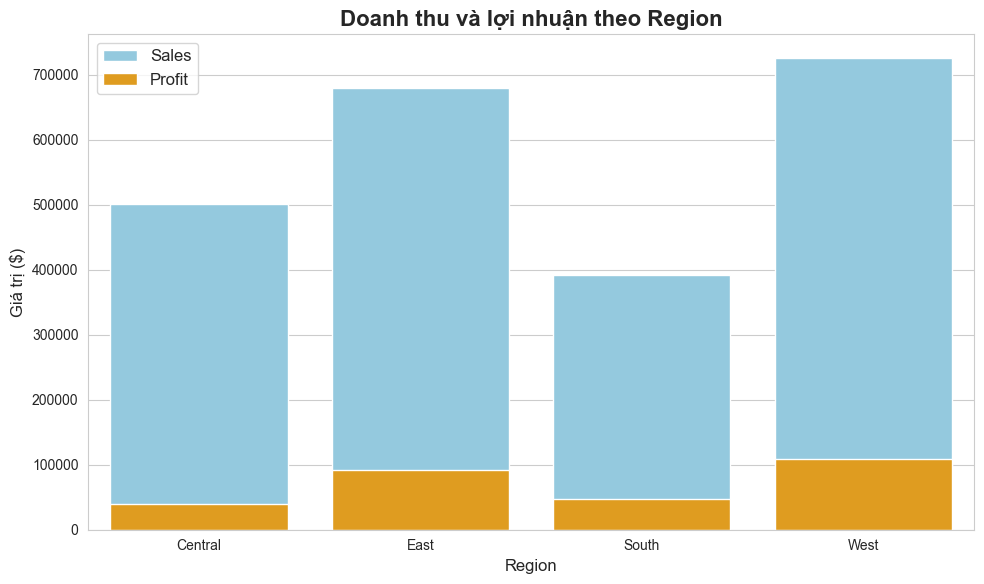

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\1560655972.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis')


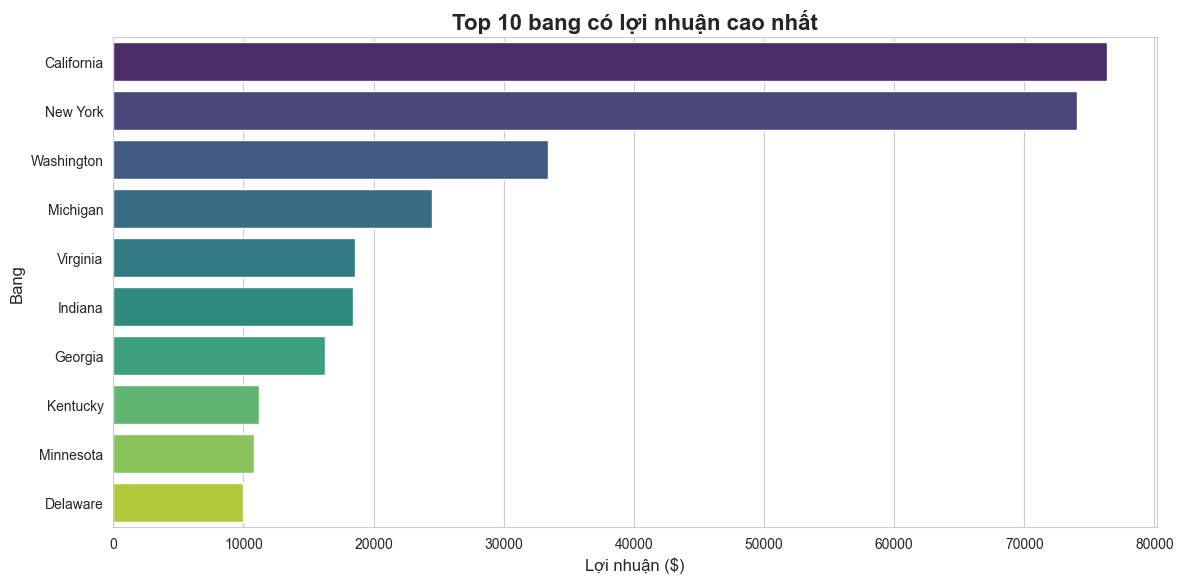

In [15]:
# ✅ Tổng doanh thu và lợi nhuận theo khu vực
region_summary = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(data=region_summary, x='Region', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=region_summary, x='Region', y='Profit', color='orange', label='Profit')
plt.title('Doanh thu và lợi nhuận theo Region')
plt.ylabel('Giá trị ($)')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Top 10 bang (State) theo lợi nhuận
state_summary = data.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)

# Vẽ biểu đồ top 10 bang
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis')
plt.title('Top 10 bang có lợi nhuận cao nhất')
plt.xlabel('Lợi nhuận ($)')
plt.ylabel('Bang')
plt.tight_layout()
plt.show()


### Monthly Sales Analysis

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3795755272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d')


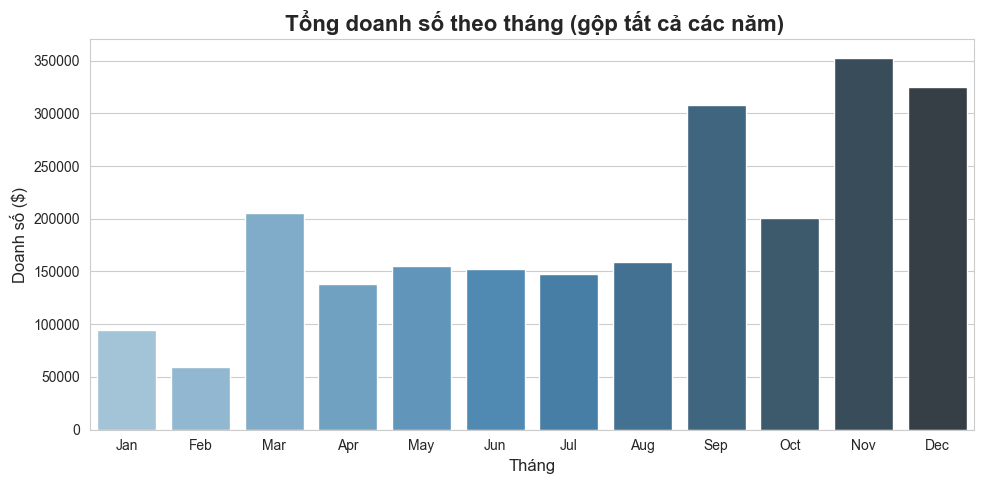

In [16]:
# Tổng doanh số theo tháng (không phân biệt năm)
monthly_sales = data.groupby('Order Month')['Sales'].sum().reset_index()

# Biểu đồ doanh số theo tháng
plt.figure(figsize=(10, 5))
sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d')
plt.title(' Tổng doanh số theo tháng (gộp tất cả các năm)')
plt.xlabel('Tháng')
plt.ylabel('Doanh số ($)')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


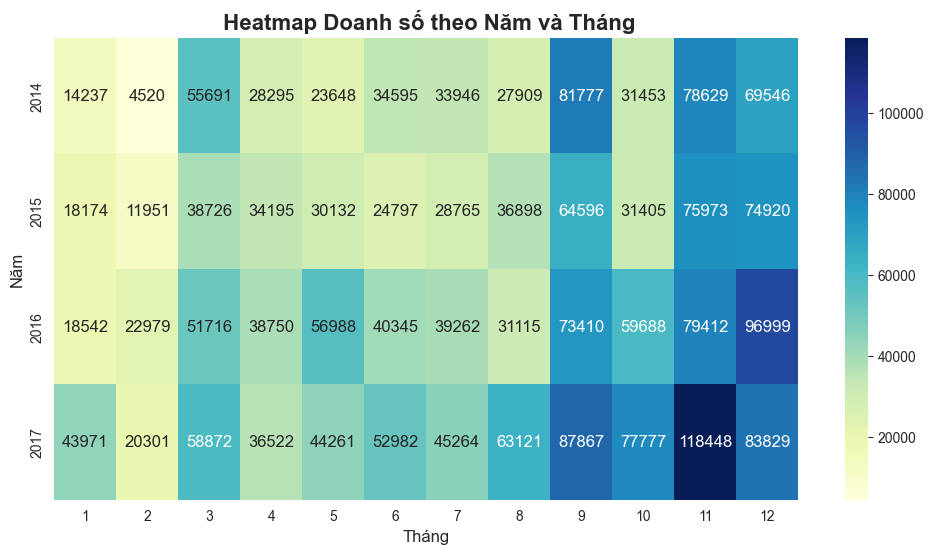

In [17]:
# Pivot để tạo bảng doanh số theo từng tháng & năm
heatmap_data = data.pivot_table(index='Order Year', columns='Order Month', values='Sales', aggfunc='sum')

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title(' Heatmap Doanh số theo Năm và Tháng')
plt.xlabel('Tháng')
plt.ylabel('Năm')
plt.show()


### Sales Analysis by Category

In [18]:
category_sales = data.groupby('Category')['Sales'].sum().reset_index()


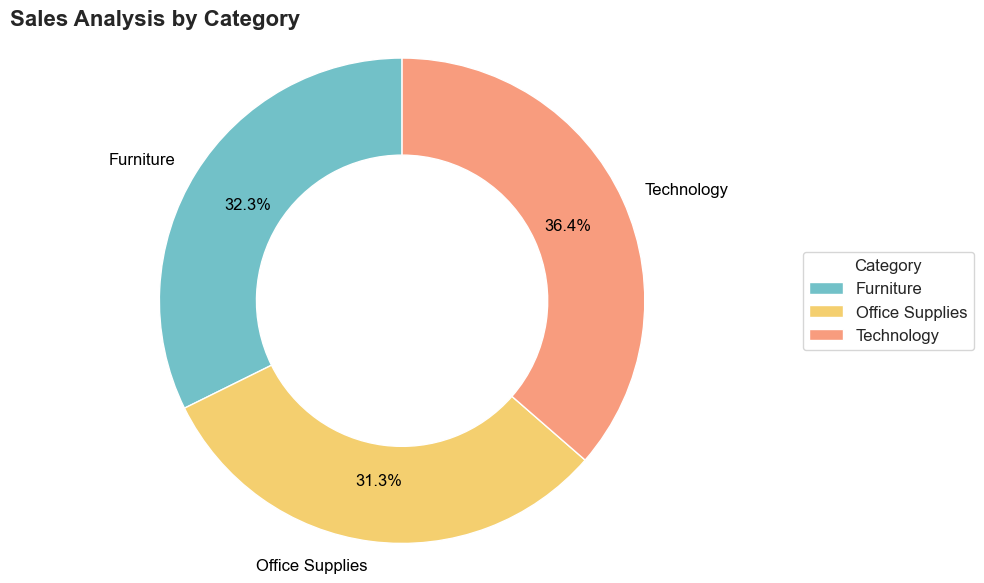

In [19]:
# Group total sales by category
category_sales = data.groupby('Category')['Sales'].sum().reset_index()

# Set colors
colors = ['#72C1C8', '#F4CF6F', '#F89C7E']  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Donut chart
wedges, texts, autotexts = ax.pie(
    category_sales['Sales'],
    labels=category_sales['Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    wedgeprops=dict(width=0.4),
    textprops=dict(color='black', fontsize=12)
)


ax.axis('equal')


plt.title("Sales Analysis by Category", fontsize=16, loc='left')

# Add legend to the right top corner
ax.legend(
    wedges,
    category_sales['Category'],
    title="Category",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Adjust layout
plt.tight_layout()
plt.show()


### Sales Analysis by Sub-Category

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3574247608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategory_summary, x='Sub-Category', y='Sales', palette='pastel')


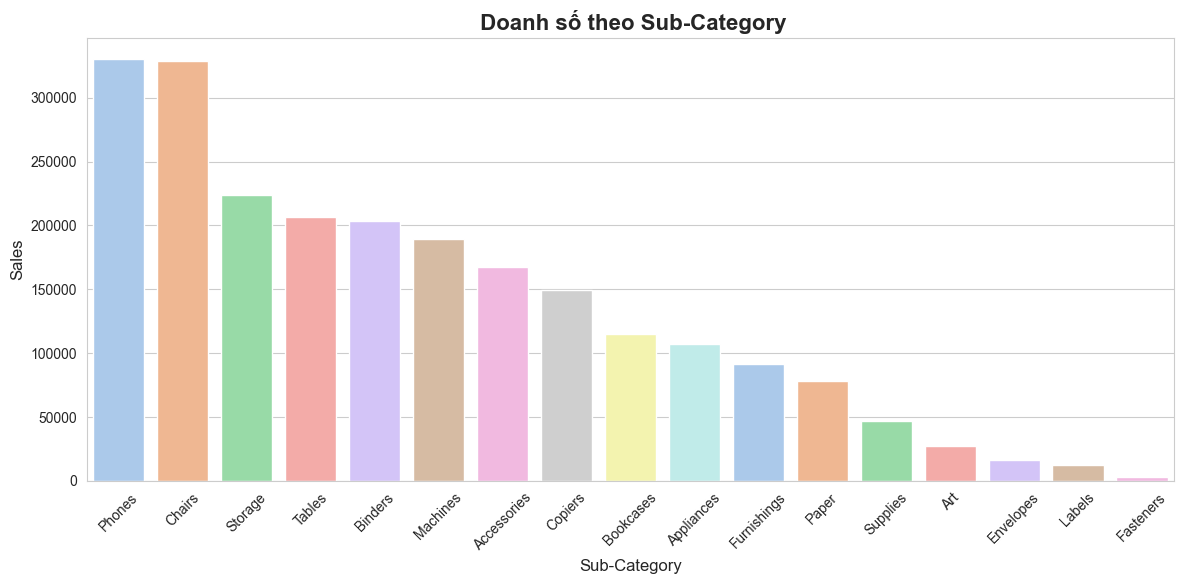

In [24]:
# Tổng doanh số và lợi nhuận theo Sub-Category
subcategory_summary = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

# Biểu đồ doanh số theo Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=subcategory_summary, x='Sub-Category', y='Sales', palette='pastel')
plt.xticks(rotation=45)
plt.title(' Doanh số theo Sub-Category')
plt.tight_layout()
plt.show()



### Monthly Profit Analysis

In [25]:
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Đảm bảo ngày tháng đúng định dạng
data['Order YearMonth'] = data['Order Date'].dt.to_period('M')  # Năm-Tháng định dạng gộp


In [26]:
# Nhóm lợi nhuận theo Year-Month
monthly_profit = data.groupby('Order YearMonth')['Profit'].sum().reset_index()
monthly_profit['Order YearMonth'] = monthly_profit['Order YearMonth'].astype(str)  # Convert Period to str


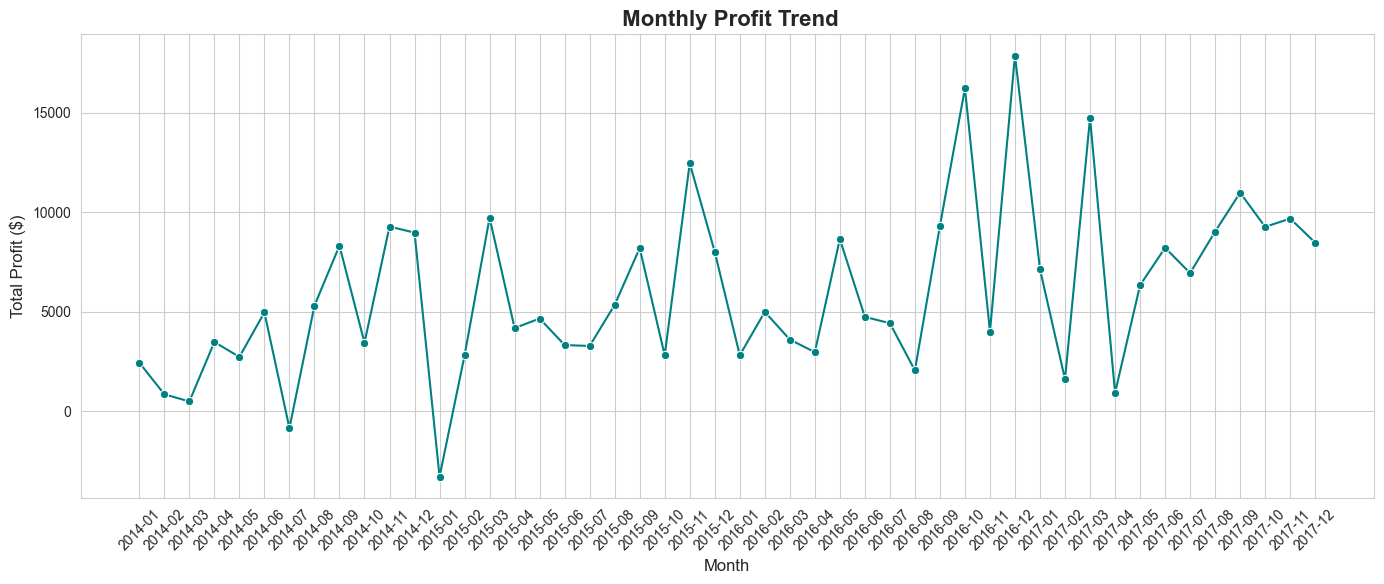

In [27]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_profit, x='Order YearMonth', y='Profit', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title(' Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Profit Analysis by Category

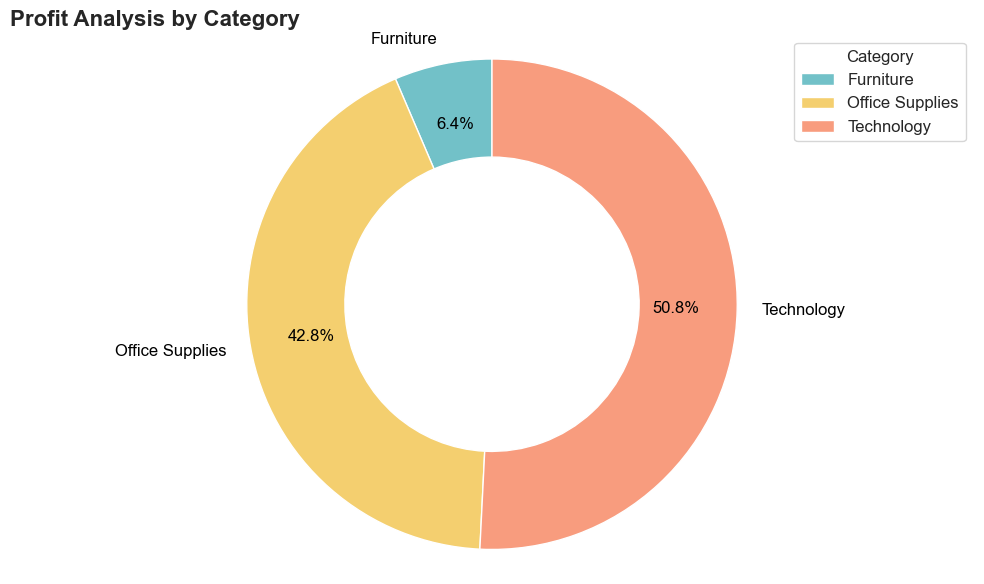

In [28]:
# Group total profit by category
category_sales = data.groupby('Category')['Profit'].sum().reset_index()

# Set colors
colors = ['#72C1C8', '#F4CF6F', '#F89C7E']  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create donut chart
wedges, texts, autotexts = ax.pie(
    category_sales['Profit'],  
    labels=category_sales['Category'],  
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,  
    pctdistance=0.75, 
    wedgeprops=dict(width=0.4),  
    textprops=dict(color='black', fontsize=12) 
)

# Set axis to equal for proper circular shape
ax.axis('equal')

# Move title to the left corner
plt.title("Profit Analysis by Category", fontsize=16, loc='left')  

# Add legend to the right top corner
ax.legend(
    wedges,
    category_sales['Category'],  
    title="Category",  
    loc='upper right', 
    bbox_to_anchor=(1, 1)  
)

plt.tight_layout()
plt.show()

### Profit Analysis by Sub-Category

C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3343082111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette='coolwarm')


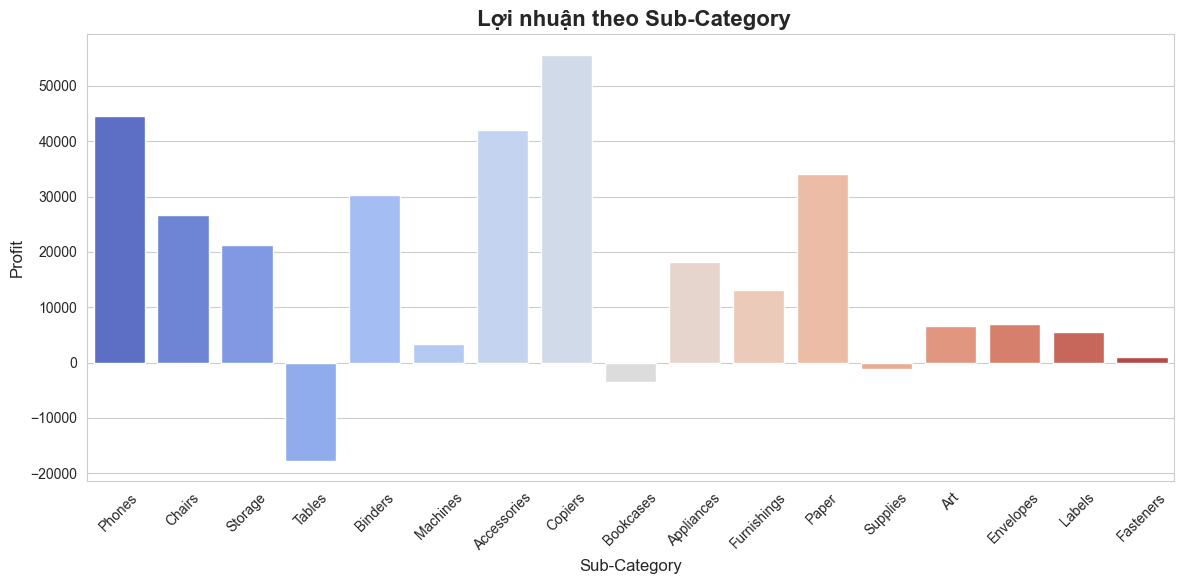

In [29]:
# Biểu đồ lợi nhuận theo Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette='coolwarm')
plt.xticks(rotation=45)
plt.title(' Lợi nhuận theo Sub-Category')
plt.tight_layout()
plt.show()


### Sales and Profit Analysis by Customer Segment

In [30]:
from matplotlib.ticker import FuncFormatter 



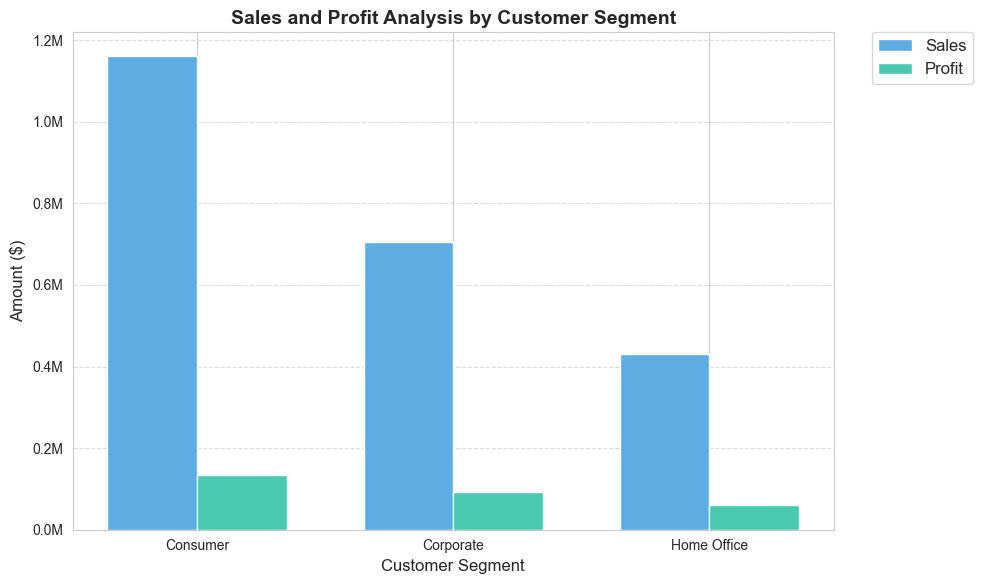

In [31]:

segment_data = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(segment_data))  # Using numpy array for indexing

# Sales bar
plt.bar(index, segment_data['Sales'], width=bar_width, label='Sales', color='#5DADE2')

# Profit bar
plt.bar(index + bar_width, segment_data['Profit'], width=bar_width, label='Profit', color='#48C9B0')

# Format Y-axis to show in millions (e.g., 1M, 2M)
def millions(x, pos):
    return f'{x / 1e6:.1f}M'  # Adjusted for decimal points

# Apply formatter to Y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # FuncFormatter is now correctly imported

# Labels & formatting
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Sales and Profit Analysis by Customer Segment', fontsize=14, weight='bold')
plt.xticks(index + bar_width / 2, segment_data['Segment'], fontsize=10)  # Enhanced tick labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



### Shipping time vs profit

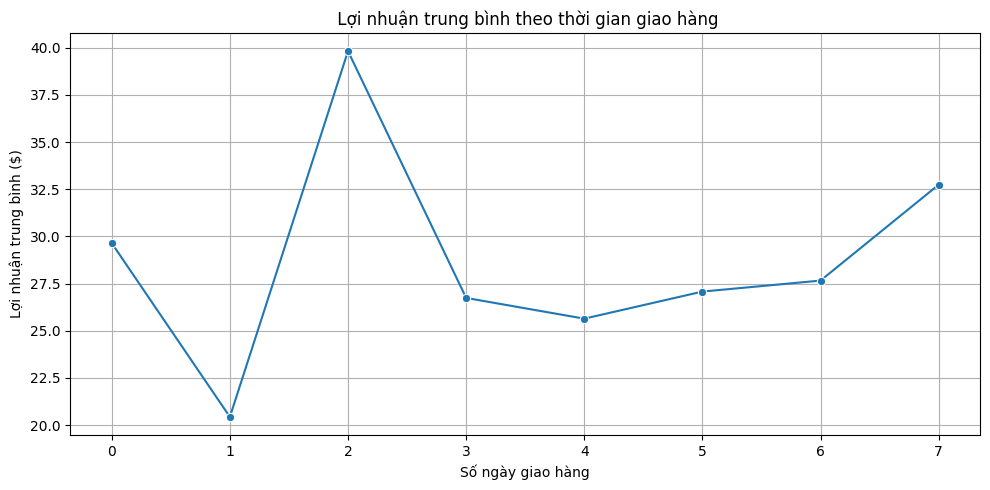

In [37]:
# Trung bình lợi nhuận theo thời gian giao hàng
shipping_impact = data.groupby('Shipping Time (days)')['Profit'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.lineplot(data=shipping_impact, x='Shipping Time (days)', y='Profit', marker='o')
plt.title(' Lợi nhuận trung bình theo thời gian giao hàng')
plt.xlabel('Số ngày giao hàng')
plt.ylabel('Lợi nhuận trung bình ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### analyse sales-to-profit ratio

In [34]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3198762665.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis', ax=axes[0, 1])
C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3198762665.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d', ax=axes[1, 0])
d:\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\PC\AppData\Local\Temp\ipykernel_1968\3198762665.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

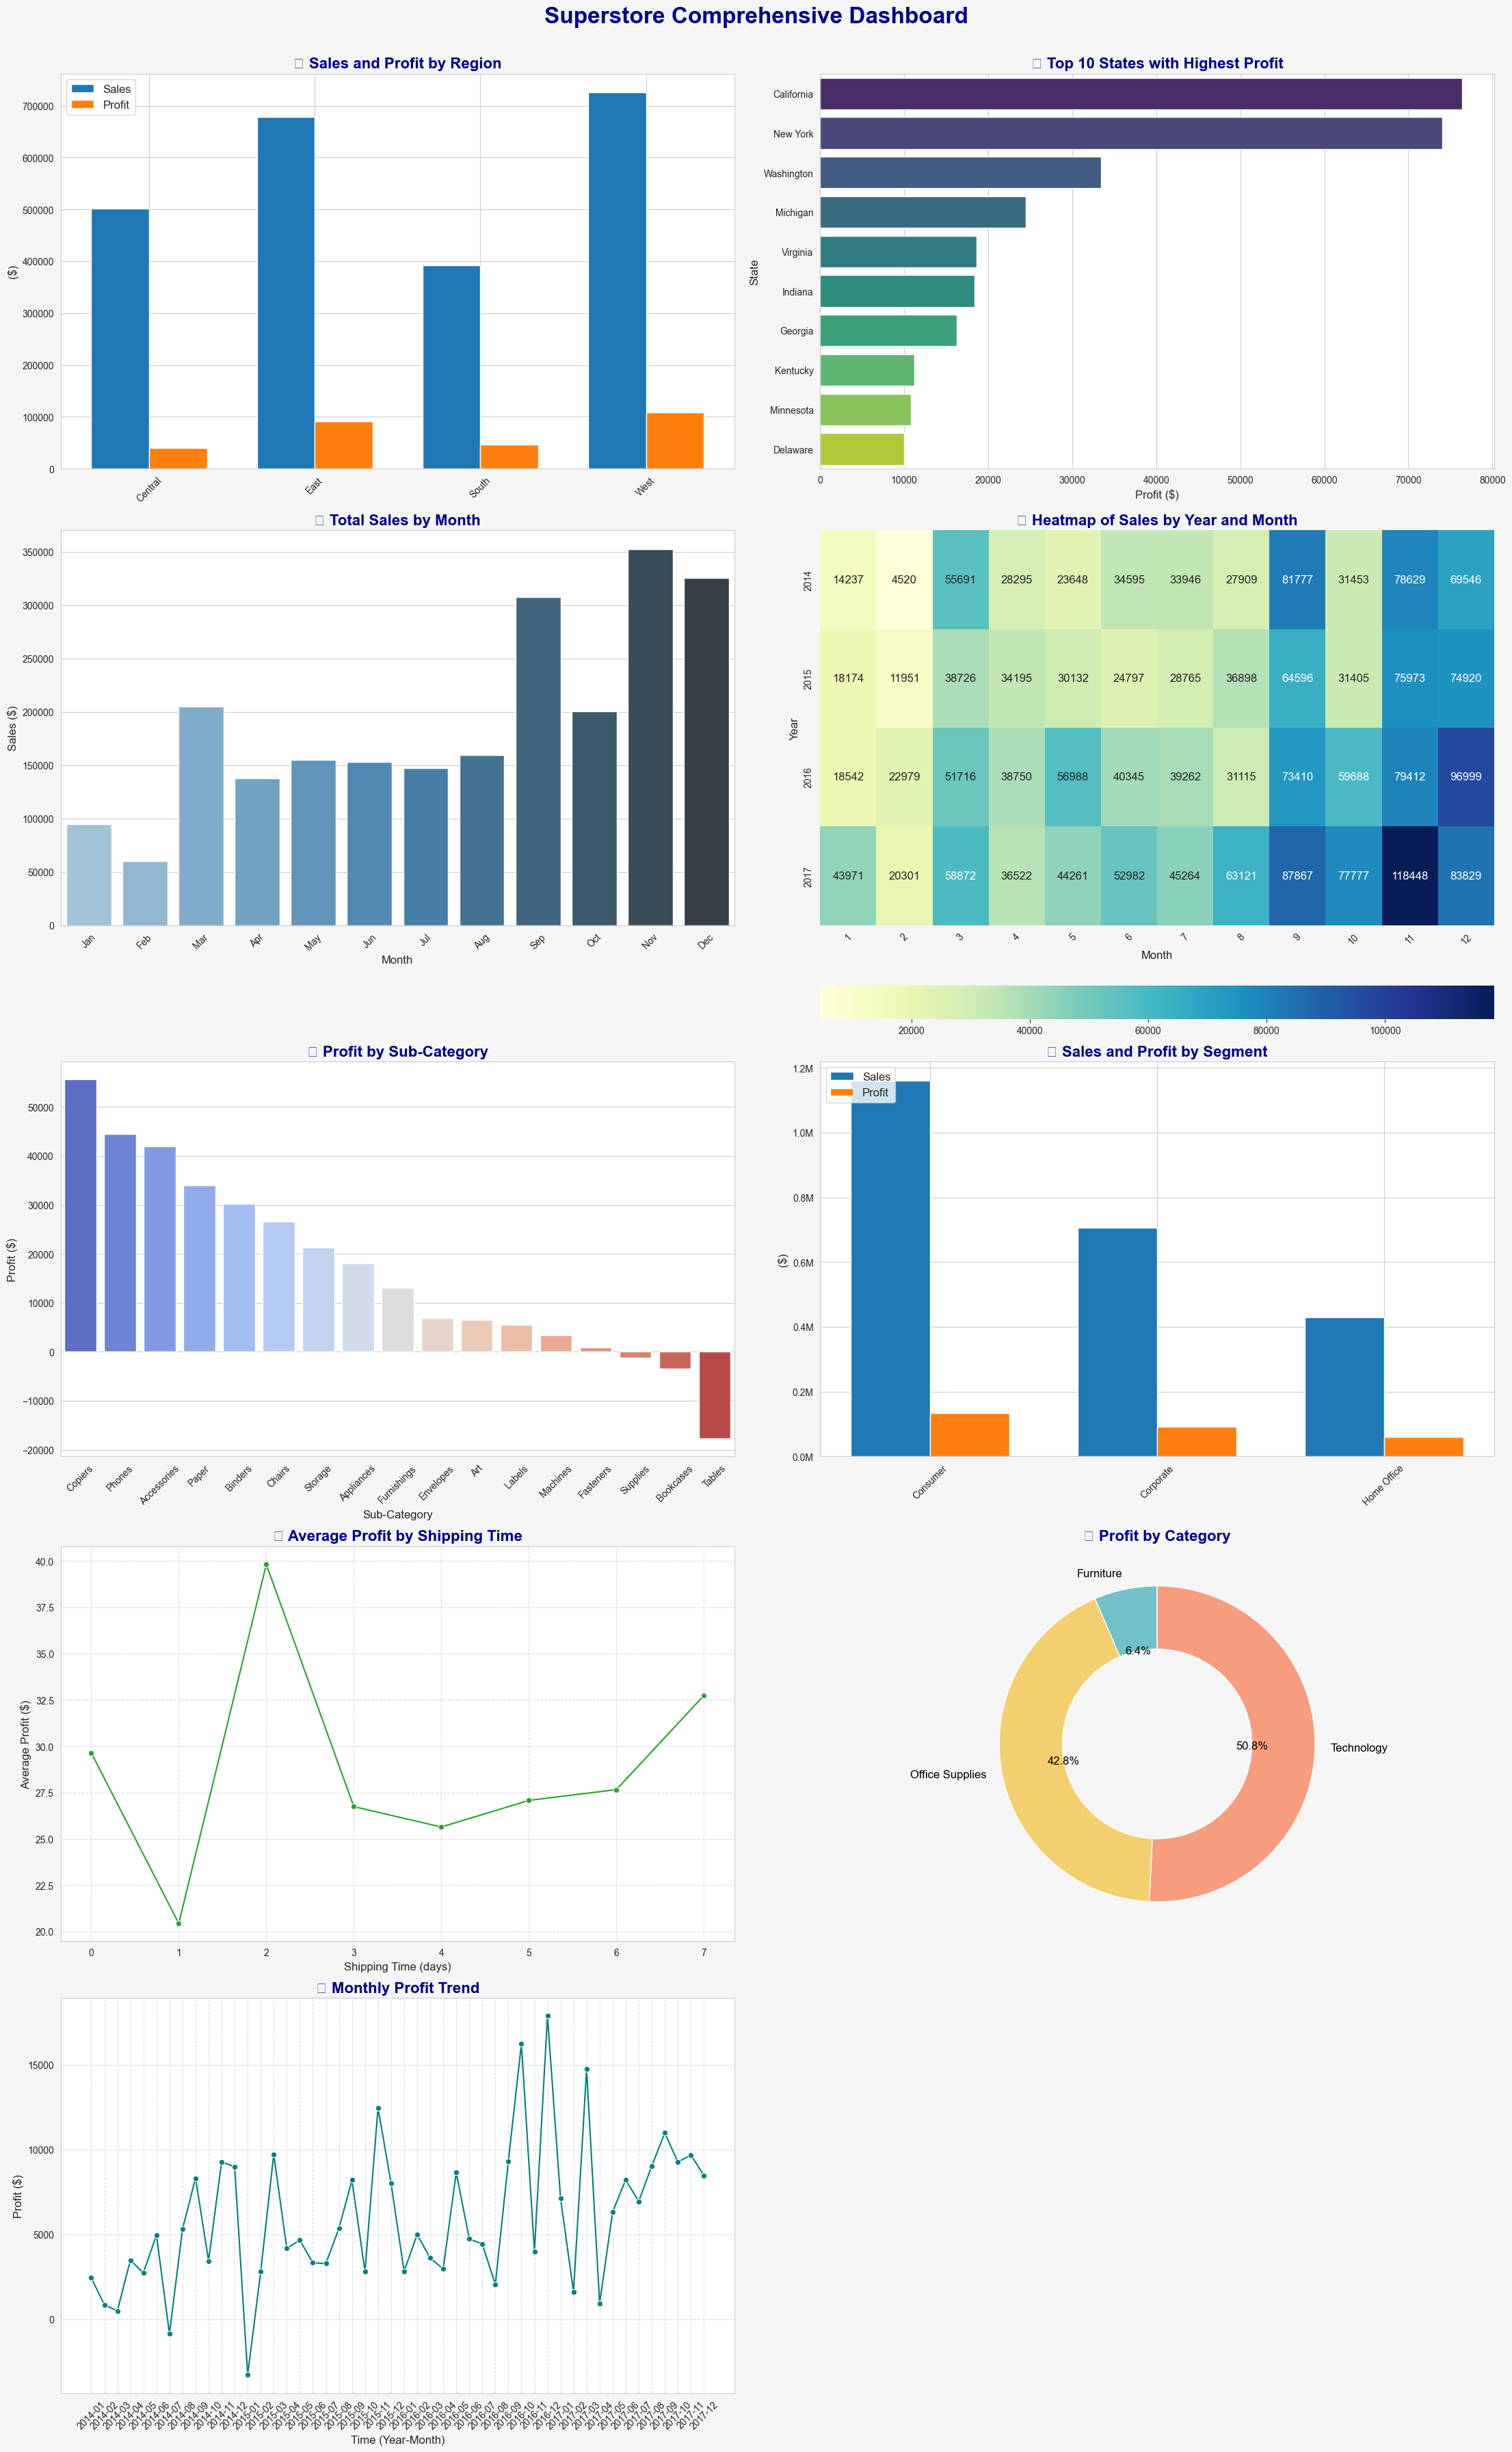

In [32]:
# Set up a professional style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Create figure and grid with 5 rows and 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 35), constrained_layout=True)
fig.set_facecolor('#f5f5f5')  # Light background color for the entire dashboard

# ✅ Chart 1: Total Sales and Profit by Region
region_summary = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
bar_width = 0.35
index = np.arange(len(region_summary))
axes[0, 0].bar(index - bar_width/2, region_summary['Sales'], bar_width, label='Sales', color='#1f77b4')
axes[0, 0].bar(index + bar_width/2, region_summary['Profit'], bar_width, label='Profit', color='#ff7f0e')
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(region_summary['Region'], rotation=45)
axes[0, 0].set_title('🔹 Sales and Profit by Region', color='darkblue')
axes[0, 0].set_ylabel('($)')
axes[0, 0].legend(loc='upper left')

# ✅ Chart 2: Top 10 States with Highest Profit
state_summary = data.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).head(10)
sns.barplot(data=state_summary.reset_index(), x='Profit', y='State', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('🔹 Top 10 States with Highest Profit', color='darkblue')
axes[0, 1].set_xlabel('Profit ($)')
axes[0, 1].set_ylabel('State')

# ✅ Chart 3: Total Sales by Month
monthly_sales = data.groupby('Order Month')['Sales'].sum().reset_index()
sns.barplot(x='Order Month', y='Sales', data=monthly_sales, palette='Blues_d', ax=axes[1, 0])
axes[1, 0].set_title('🔹 Total Sales by Month', color='darkblue')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Sales ($)')
axes[1, 0].set_xticks(range(0, 12))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# ✅ Chart 4: Heatmap of Sales by Year and Month
heatmap_data = data.pivot_table(index='Order Year', columns='Order Month', values='Sales', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1, 1], cbar_kws={'orientation': 'horizontal'})
axes[1, 1].set_title('🔹 Heatmap of Sales by Year and Month', color='darkblue')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Year')
axes[1, 1].tick_params(axis='x', rotation=45)

# ✅ Chart 5: Profit by Sub-Category
subcategory_summary = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False).reset_index()
sns.barplot(data=subcategory_summary, x='Sub-Category', y='Profit', palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('🔹 Profit by Sub-Category', color='darkblue')
axes[2, 0].set_xlabel('Sub-Category')
axes[2, 0].set_ylabel('Profit ($)')
axes[2, 0].tick_params(axis='x', rotation=45)

# ✅ Chart 6: Sales and Profit Analysis by Segment
segment_data = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
bar_width = 0.35
index = np.arange(len(segment_data))
axes[2, 1].bar(index - bar_width/2, segment_data['Sales'], bar_width, label='Sales', color='#1f77b4')
axes[2, 1].bar(index + bar_width/2, segment_data['Profit'], bar_width, label='Profit', color='#ff7f0e')
axes[2, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))
axes[2, 1].set_title('🔹 Sales and Profit by Segment', color='darkblue')
axes[2, 1].set_xticks(index)
axes[2, 1].set_xticklabels(segment_data['Segment'], rotation=45)
axes[2, 1].set_ylabel('($)')
axes[2, 1].legend(loc='upper left')

# ✅ Chart 7: Average Profit by Shipping Time
shipping_impact = data.groupby('Shipping Time (days)')['Profit'].mean().reset_index()
sns.lineplot(data=shipping_impact, x='Shipping Time (days)', y='Profit', marker='o', color='#2ca02c', ax=axes[3, 0])
axes[3, 0].set_title('🔹 Average Profit by Shipping Time', color='darkblue')
axes[3, 0].set_xlabel('Shipping Time (days)')
axes[3, 0].set_ylabel('Average Profit ($)')
axes[3, 0].grid(True, linestyle='--', alpha=0.7)

# ✅ Chart 8: Profit Analysis by Category (Donut chart)
category_profit = data.groupby('Category')['Profit'].sum().reset_index()
colors = ['#72C1C8', '#F4CF6F', '#F89C7E']
wedges, texts, autotexts = axes[3, 1].pie(
    category_profit['Profit'],
    labels=category_profit['Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(fontsize=12, color='black')
)
axes[3, 1].set_title("🔹 Profit by Category", color='darkblue')

# ✅ Chart 9: Monthly Profit Trend
monthly_profit = data.groupby('Order YearMonth')['Profit'].sum().reset_index()
monthly_profit['Order YearMonth'] = monthly_profit['Order YearMonth'].astype(str)
sns.lineplot(data=monthly_profit, x='Order YearMonth', y='Profit', marker='o', color='teal', ax=axes[4, 0])
axes[4, 0].set_title('🔹 Monthly Profit Trend', color='darkblue')
axes[4, 0].set_xlabel('Time (Year-Month)')
axes[4, 0].set_ylabel('Profit ($)')
axes[4, 0].tick_params(axis='x', rotation=45)
axes[4, 0].grid(True, linestyle='--', alpha=0.7)

# Last position (axes[4, 1]) is left empty or can be used for additional info
axes[4, 1].axis('off')  # Temporarily disable to keep the dashboard clean

# ✅ Add main title for the entire dashboard
fig.suptitle('Superstore Comprehensive Dashboard', fontsize=24, weight='bold', color='darkblue', y=1.02)

# Display the dashboard
plt.show()